**Topic:** TensorFlow 2.x MNIST Classification with DNN (Only Dense Layers)

**Section:** Code Block: import tensorflow as tf

In [ ]:
import tensorflow as tf
from keras.src import layers
from keras.src.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
import keras
import matplotlib.pyplot as plt
import numpy as np

**Section:** Code Block: # Load and preprocess data

In [ ]:
# Load and preprocess data

(train_images, train_labels), (test_images, test_labels) = (
    tf.keras.datasets.mnist.load_data()
)

train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

**Section:** Code Block: plt.figure(figsize=(10, 5))

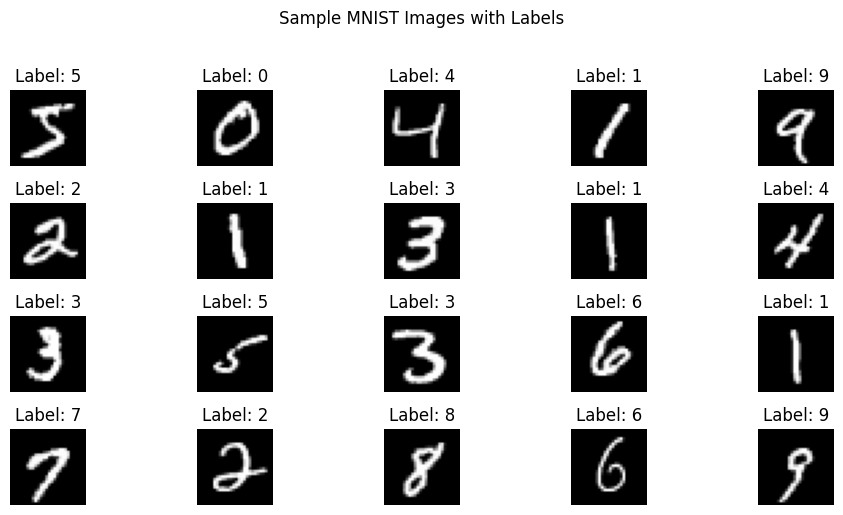

In [ ]:
plt.figure(figsize=(10, 5))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {train_labels[i]}")
    plt.axis("off")
plt.suptitle("Sample MNIST Images with Labels", y=1.02)
plt.tight_layout()
plt.show()

**Section:** Code Block: plt.figure(figsize=(8, 4))

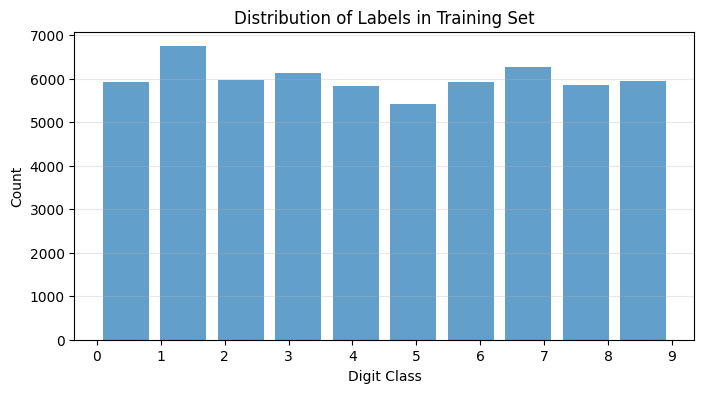

In [ ]:
plt.figure(figsize=(8, 4))
plt.hist(train_labels, bins=10, rwidth=0.8, alpha=0.7)
plt.xticks(range(10))
plt.title("Distribution of Labels in Training Set")
plt.xlabel("Digit Class")
plt.ylabel("Count")
plt.grid(axis="y", alpha=0.3)
plt.show()

**Section:** Code Block: model = keras.Sequential([

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    layers.GaussianNoise(0.1),

    keras.layers.Dense(2048, kernel_regularizer=regularizers.l2(1e-5)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.2),

    keras.layers.Dense(1024, kernel_regularizer=regularizers.l2(1e-5)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.2),

    keras.layers.Dense(512, kernel_regularizer=regularizers.l2(1e-5)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.2),

    keras.layers.Dense(256, kernel_regularizer=regularizers.l2(1e-5)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.1),

    keras.layers.Dense(10, activation='softmax')
])

**Section:** Code Block: optimizer = keras.optimizers.AdamW(learning_rate=0.001)

In [13]:
optimizer = keras.optimizers.AdamW(learning_rate=0.001)

model.compile(
    optimizer=optimizer, loss=keras.losses.SparseCategoricalCrossentropy(), metrics=[keras.metrics.SparseCategoricalAccuracy()]
)

**Section:** Code Block: early_stop = EarlyStopping(monitor="val_loss", patience=12, restore_best_weights=True)

In [11]:
early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

lr_schedule = ReduceLROnPlateau(
    monitor='val_loss',    
    factor=0.5,
    patience=2,
    min_lr=1e-5,
    verbose=1
)

history = model.fit(
    train_images,
    train_labels,
    epochs=50,
    batch_size=128,
    validation_split = 0.1,
    callbacks=[early_stop, lr_schedule],
)

Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 59ms/step - loss: 0.1141 - sparse_categorical_accuracy: 0.9839 - val_loss: 0.0991 - val_sparse_categorical_accuracy: 0.9893 - learning_rate: 0.0010
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 58ms/step - loss: 0.1099 - sparse_categorical_accuracy: 0.9844 - val_loss: 0.1071 - val_sparse_categorical_accuracy: 0.9873 - learning_rate: 0.0010
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1090 - sparse_categorical_accuracy: 0.9866
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
422/422 ━━━━━━━━━━━━━━━━━━━━ 25s 59ms/step - loss: 0.1090 - sparse_categorical_accuracy: 0.9866 - val_loss: 0.1129 - val_sparse_categorical_accuracy: 0.9883 - learning_rate: 0.0010
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 26s 61ms/step - loss: 0.0977 - sparse_categorical_accuracy: 0.9912 - val_loss: 0.0989 - val_sparse_categorical_accuracy: 0.9908 - learning_rate: 5.0000e-04
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 56ms/step - l

**Section:** Code Block: test_loss, test_acc = model.evaluate(test_images, test_labels)

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0971 - sparse_categorical_accuracy: 0.9859

Test accuracy: 0.9889


**Section:** Code Block: # Plot training history

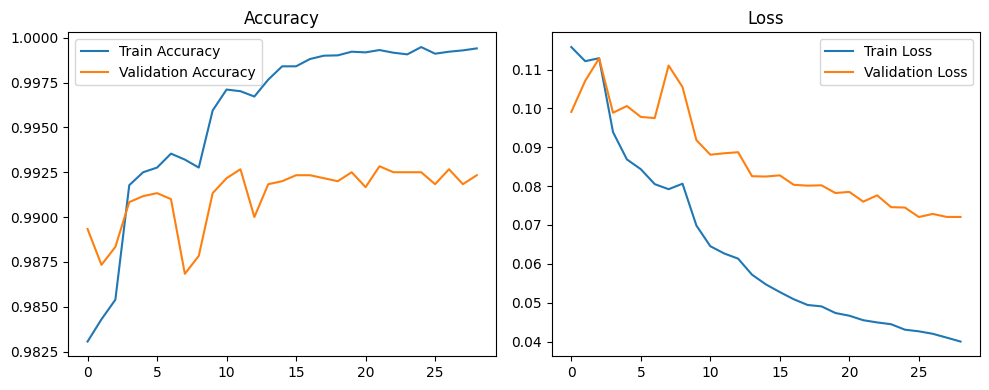

In [18]:
# Plot training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["sparse_categorical_accuracy"], label="Train Accuracy")
plt.plot(history.history["val_sparse_categorical_accuracy"], label="Validation Accuracy")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss")
plt.legend()
plt.tight_layout()
plt.show()

**Section:** Code Block: model.summary()

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gaussian_noise (GaussianNoise)  │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2048)           │     1,607,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,379,914 (16.71 MB)

 Trainable params: 4,372,234 (16.68 MB)

 Non-trainable params: 7,680 (30.00 KB)

**Section:** Code Block: # Make predictions and visualize

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


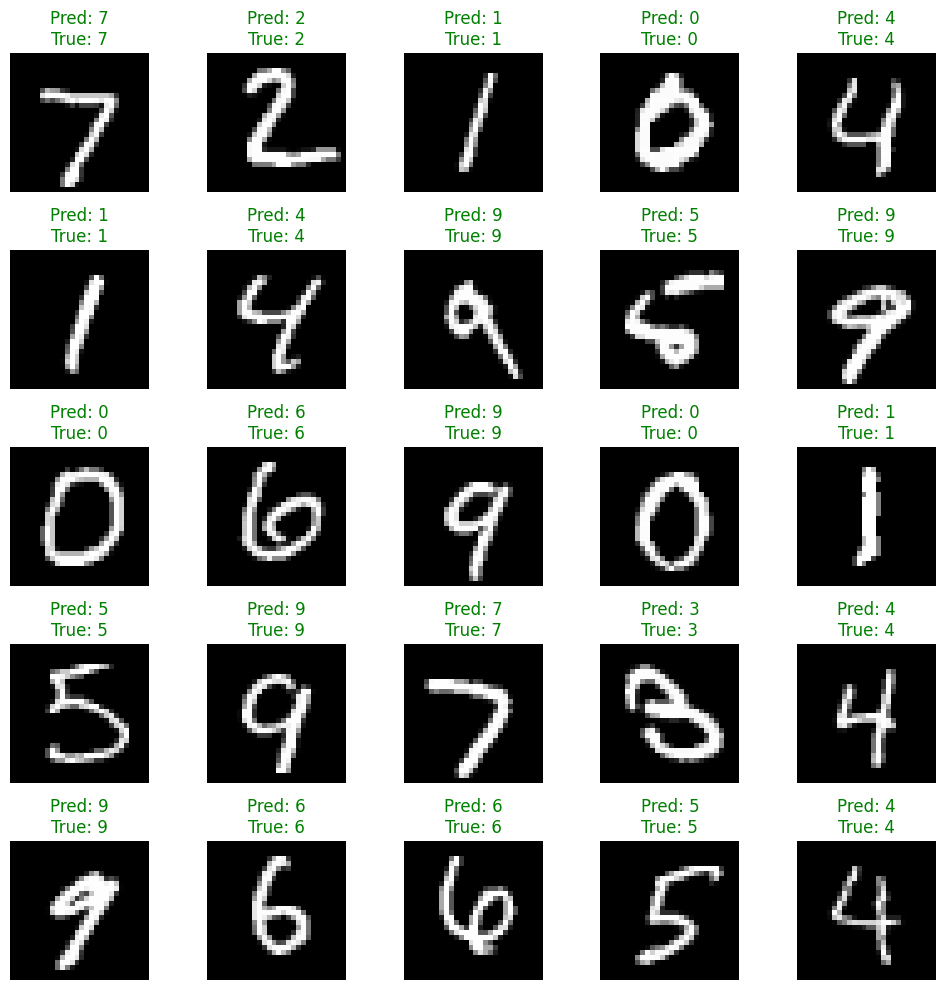

In [20]:
# Make predictions and visualize
predictions = model.predict(test_images)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
    pred_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    color = "green" if pred_label == true_label else "red"
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
    plt.axis("off")
plt.tight_layout()
plt.show()